**Método de Runge Kutta de orden 4**

importamos las librerias

In [19]:
#importamos las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np 

**Método de Runge Kuta de orden 4**

De la formula de Runge-Kutta de orden 4 tenemos:

$$ m_1 = u_i $$
$$ k_1 =f(x_i,y_i, u_i) $$

$$ m_2 = u_i + \dfrac{h}{2}k_1 $$
$$ k_2 = f\left(x_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_1, u_i+\dfrac{h}{2}k_1 \right) $$ 

$$ m_3 = u_i + \dfrac{h}{2}k_2 $$
$$ k_3 = f\left(x_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_2, u_i+\dfrac{h}{2}k_2 \right) $$

$$ m_4 = u_i + hk_3 $$
$$ k_4 = f\left(x_i+ h,y_i+hm_3, u_i+hk_3 \right) $$

Finalmente la aproximación para la EDO:

$$ y_{i+1}=y_i + h\dfrac{m_1+2m_2+2m_3+m_4}{6}  $$ 
$$ u_{i+1}=u_i + h\dfrac{k_1+2k_2+2k_3+k_4}{6}  $$ 

Ingresamos las ecuacioense en $f1,g1$

In [20]:
def f1(t, x, y):
  dvy1 =  -4*x+3*y+6  
  return (dvy1)

def g1(t,x,y):
  gt = -2.4*x+1.6*y+3.6
  return (gt)


In [21]:
def RK4(ti,xi, yi, tf, h):
  n = round((tf - ti)/h)                                     #cantidad de intervalos
  t = np.linspace(ti, tf, int(n+1))                   #valores de x
  yf=[]                                               #aproximacion de la integral de f'x                                          #vector de k4
  yf.append(yi)
  xf=[]
  xf.append(xi)

  for i in range (int(n)):
    m1=f1(t[i],xf[i], yf[i])
    k1 = g1(t[i],xf[i], yf[i])

    m2= f1(t[i]+(h/2), xf[i]+(h/2)*m1, yf[i]+(h/2)*k1) 
    k2 = g1(t[i]+(h/2), xf[i]+(h/2)*m1, yf[i]+(h/2)*k1)

    m3= f1(t[i]+(h/2), xf[i]+(h/2)*m2, yf[i]+(h/2)*k2)
    k3 = g1(t[i]+(h/2), xf[i]+(h/2)*m2, yf[i]+(h/2)*k2)
    
    m4= f1(t[i]+h, xf[i]+h*m3, yf[i]+h*k3)
    k4 = g1(t[i]+h, xf[i]+h*m3, yf[i]+h*k3)
    
    xf.append(xf[i] + (h/6)*(m1 + 2*m2 + 2*m3 + m4))
    yf.append(yf[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4))

  return (t,xf,yf)


Digitamos los valores iniciales del sistema.

In [22]:
#Valores iniciales

ti = 0                            #Valor Inicial de 't'
xi = 0
yi = 0                         #Valor inicial de 'y'

#Limite superior de integracion
tf = 0.5                           #Valor Final de 't'

#Tamaño de Paso o incremento
h1 = 0.1                            

#Unvicamos al metodo de Runge - Kutta de oreden 2
t,x1, yf1 = RK4(ti,xi ,yi, tf, h1)

Valores en pantalla con 8 cifras decimales 

In [23]:
print("ti       yi        \tui")
for t,x,y in zip(t,x1,yf1):
    print(f"{t:.2f}\t{x:.8f}\t{y:.8f}")


ti       yi        	ui
0.00	0.00000000	0.00000000
0.10	0.53825520	0.31962624
0.20	0.96849874	0.56878217
0.30	1.31071904	0.76073313
0.40	1.58126524	0.90632062
0.50	1.79350749	1.01440242


Para la grafica de los valores obtenidos 

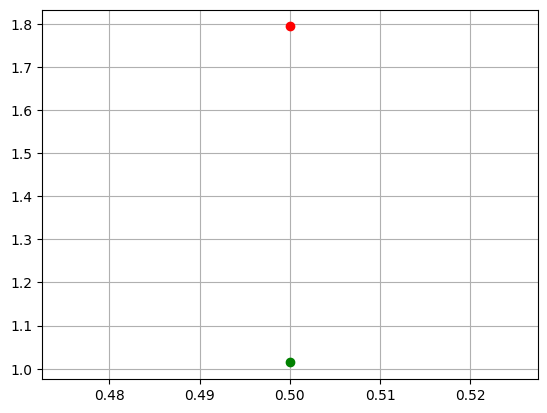

In [24]:
plt.plot(t, x, 'ro')  
plt.plot(t, y,'go')
plt.grid()                                #Grafic
plt.show() 